In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

## Loading datasets
Note that the seperator of these `csv` files are `\t` instead of `,` used in common.

In [2]:
behav_dtype = dict(
    video_id='int',
    is_watch='category',
    is_share='category',
    is_collect='category',
    is_comment='category',
    watch_start_time='object',
    watch_label='category',
    pt_d='object'
)

behav_file = '../datasets/raw/traindata/history_behavior_data.csv'
df = pd.read_csv(behav_file, sep='\t', index_col='user_id', dtype=behav_dtype)

/home/wupj/miniconda3/envs/pytorch17/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## View & Quality
### view
Head view of *behavior* dataset, which entirely consists of discrete numbers. There are `80276856` users' record in the dataset.

The *behavior* dataset consists entirely of numbers, it's good.

In [3]:
df.head()

,video_id,is_watch,is_share,is_collect,is_comment,watch_start_time,watch_label,pt_d
user_id,,,,,,,,
2119099,28411,0,0,0,0,NaN,0,20210419
2119099,3366,0,0,0,0,NaN,0,20210419
2119099,12968,0,0,0,0,NaN,0,20210419
214949,23241,0,0,0,0,NaN,0,20210419
214949,12968,0,0,0,0,NaN,0,20210419


In [4]:
df = df.drop(['watch_start_time', 'pt_d'], axis=1)

In [5]:
df.describe(include='category')

,is_watch,is_share,is_collect,is_comment,watch_label
count,80276856,80276856,80276856,80276856,80276856
unique,2,2,2,2,10
top,0,0,0,0,0
freq,72923832,80261906,80184737,80264414,78100575


### Quality
- [x] No duplicte record.
- [x] No `nan` record.

In [6]:
# check nan
print('nan numbers:')
pd.DataFrame(df.isnull().sum()).T

nan numbers:


,video_id,is_watch,is_share,is_collect,is_comment,watch_label
0,0,0,0,0,0,0


## Statistics
### user
* `3953209` users in *behavior* dataset, which are significant less than those (`5910800`) in *user* dataset.
* each user has `20` record in average, median number is `6`.

user number=3953209.
min=1, mean=20.306757371037047, median=6.0, max=9942.


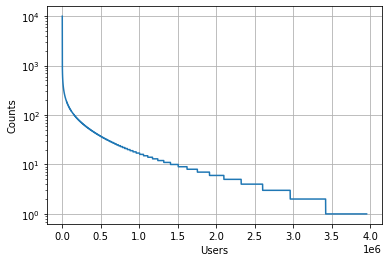

In [7]:
user_record_count = df.index.value_counts()
print(f'user number={user_record_count.shape[0]}.')
print(f'min={user_record_count.min()}, ', end='')
print(f'mean={user_record_count.mean()}, ', end='')
print(f'median={user_record_count.median()}, ', end='')
print(f'max={user_record_count.max()}.')
fig, ax = plt.subplots(1,1)
ax.grid()
ax.plot(user_record_count.values)
ax.set_yscale('log')
ax.set_xlabel('Users')
ax.set_ylabel('Counts')
fig.show()

### vedio
* `34218` vedio in *behavior* dataset, which are significant less than those (`50355`) in *vedio* dataset.
* each vedio has `2346` record in average, median number is `175`.

vedio number=34218.
min=1, mean=2346.0417324215327, median=175.0, max=1932565.


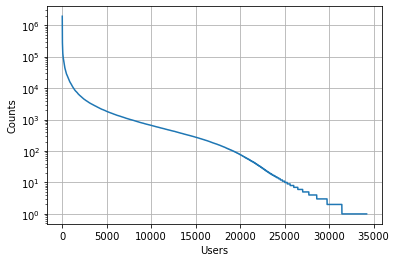

In [8]:
vedio_record_count = df.video_id.value_counts()
print(f'vedio number={vedio_record_count.shape[0]}.')
print(f'min={vedio_record_count.min()}, ', end='')
print(f'mean={vedio_record_count.mean()}, ', end='')
print(f'median={vedio_record_count.median()}, ', end='')
print(f'max={vedio_record_count.max()}.')
fig, ax = plt.subplots(1,1)
ax.grid()
ax.plot(vedio_record_count.values)
ax.set_yscale('log')
ax.set_xlabel('Users')
ax.set_ylabel('Counts')
fig.show()

### share
The positive samples of share are dramastic less than the negative samples, it must be balanced in the loss function of training.

**Important conclusion:** The distribution of watch labels over shared videos is similar to the distribution over all videos. Therefore resample the behavior records by watch labels cannot affect the distribution of is_share labels.

In [9]:
share_count = df.is_share.value_counts()
print(f'shared count:\n{share_count}')

shared count:
0    80261906
1       14950
Name: is_share, dtype: int64


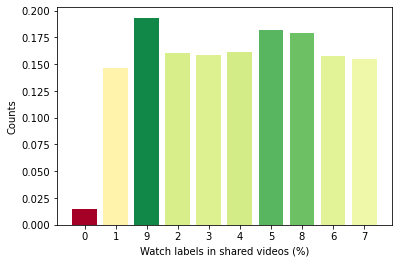

In [10]:
count  = df[df.is_share == '1'].watch_label.value_counts()
count /= df.watch_label.value_counts() / 100
norm = plt.Normalize(0.1, 0.2)
norm_values = norm(count.values)
map_vir = cm.get_cmap(name='RdYlGn')
colors  = map_vir(norm_values)
fig, ax  = plt.subplots(1,1)
ax.bar(count.index.values, count.values, color=colors)
ax.set_xlabel('Watch labels in shared videos (%)')
ax.set_ylabel('Counts')
fig.show()

### watch
The samples of watch label are dramastic unbalanced in the training set, it must be balanced in the loss function of training.

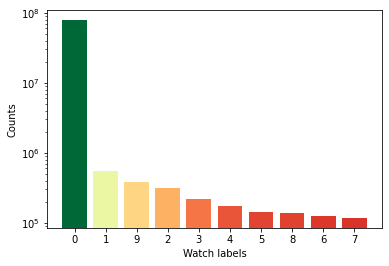

In [11]:
watch_count = df.watch_label.value_counts()
norm = plt.Normalize(1e4, 1e6)
norm_values = norm(watch_count.values)
map_vir = cm.get_cmap(name='RdYlGn')
colors  = map_vir(norm_values)
fig, ax  = plt.subplots(1,1)
ax.bar(watch_count.index.values, watch_count.values, color=colors)
ax.set_yscale('log')
ax.set_xlabel('Watch labels')
ax.set_ylabel('Counts')
fig.show()